# Melakukan import ektention yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualisasi
import seaborn as sns # Visualisasi

from sklearn.impute import KNNImputer# Imputasi
from sklearn.preprocessing import StandardScaler # Scalling
from imblearn.over_sampling import SMOTE # oversampling
from wordcloud import WordCloud # Visualisasi kata


In [2]:
!pip install wordcloud

In [3]:
!pip install imblearn

# Load Data

In [5]:
df=pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


Terdapat 768 data dengan tipe numerik. Data tersebut terdapat missing value sehingg perlu dilakukan pengecekan missing value.

In [7]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


Terlihat bahwa banyak missing value pada kolom Pregnancies, Glucosea, BlodPressure,SkinThickness, Insuline, BMI, DiabetesPedigreeFunction, Age dengan masing masing jumlah missing valuenya adalah 77,115, 154, 38, 192, 230, 77,154.

In [8]:
(df.isnull().sum()/len(df))*100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


In [9]:
# Mencari outliyer dengan IQE
def count_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IOR = Q3 - Q1
  lower_bound = Q1 - 1.5*IOR
  upper_bound = Q3 + 1.5*IOR
  return ((data< lower_bound) | (data > upper_bound)).sum()

#  Menghitung outlier di setiap kolom
outlier_counts ={}
for col in df.select_dtypes(include=['int64','float64']).columns:
  outlier_counts[col] = count_outliers_iqr(df[col])

outlier_counts_df = pd.DataFrame(outlier_counts.items()),
columns=['Kolom','Jumlah Outlier']
outlier_counts_df

outlier_counts_df


(                          0   1
 0               Pregnancies   4
 1                   Glucose   4
 2             BloodPressure  39
 3             SkinThickness   1
 4                   Insulin  26
 5                       BMI  14
 6  DiabetesPedigreeFunction  23
 7                       Age  16
 8                   Outcome   0,)

Kode program tersebut berguna untuk menghitung outlier pada suatu kolom data berdasarkan IQR. Kode tersebut diawali dengan mendefinisikan nilai kuartil dengan menghitung kuartil ke 1 dan ke 3 sebagai batas atas dan batas bawah.Kemudian mencari nilai outlier dan menyimpannya dalam dictionary. Selanjutnya hasilnya dikonversikan menjadi Dataframe sehingga menampilkan kolom kolom yang memiliki outlier.

In [10]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Terlihat bahwa label error ada 500 dan label null ada 265

<Axes: xlabel='count', ylabel='Outcome'>

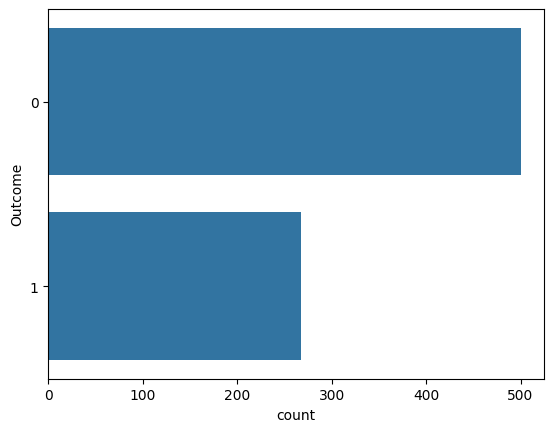

In [ ]:
sns.countplot(y='Outcome',data=df)

Text(0.5, 0.98, 'Histogram of Pima Indian Diabetes')

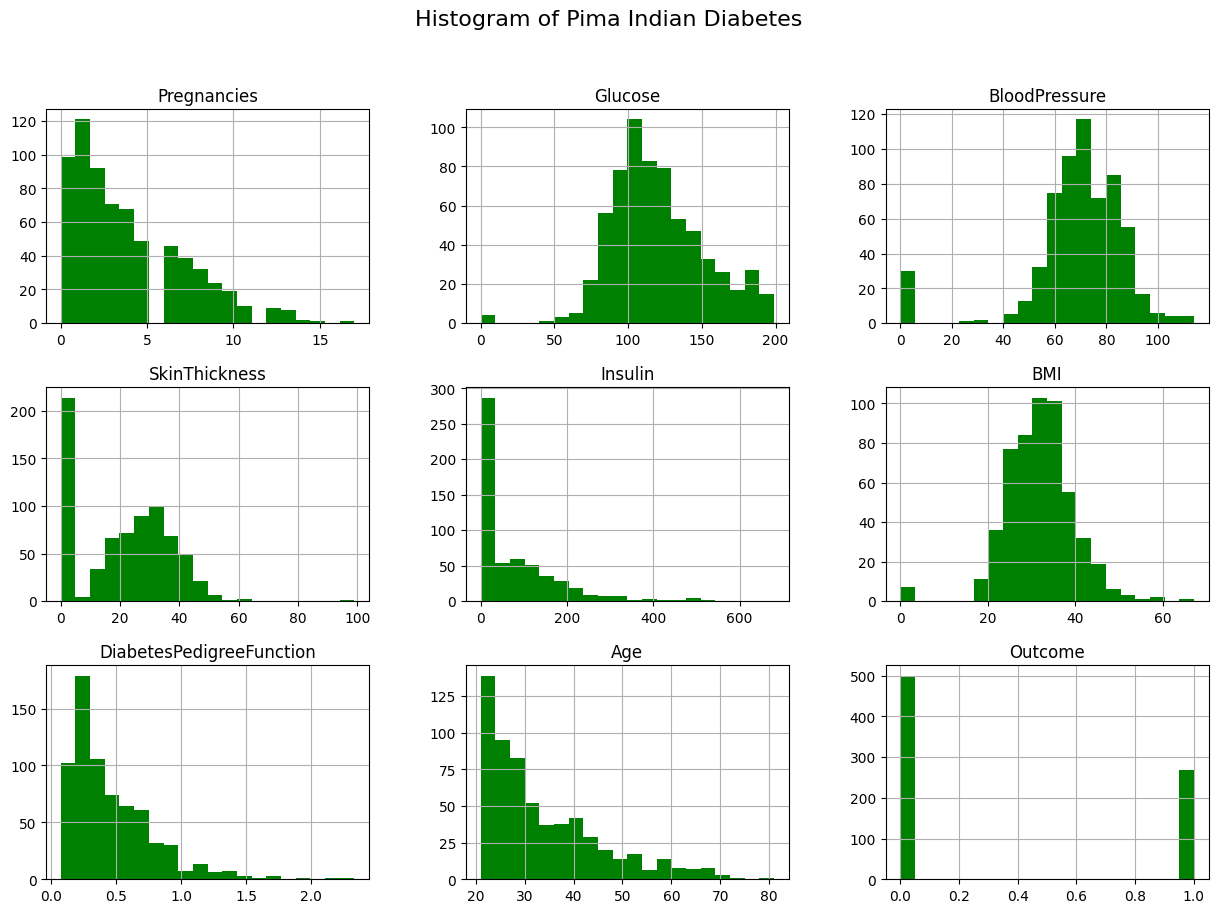

In [ ]:
df.hist(bins=20, figsize=(15,10), layout=(3,3),
color='green');
plt.suptitle('Histogram of Pima Indian Diabetes', fontsize=16)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


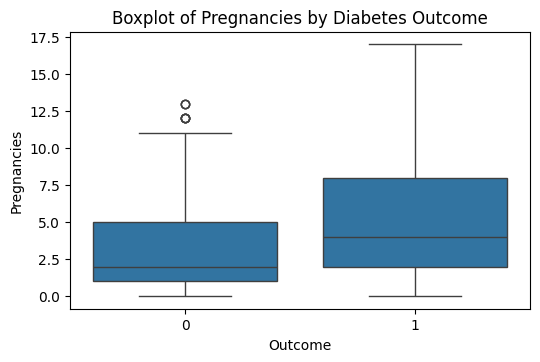

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


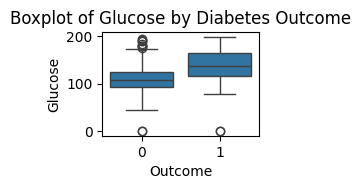

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


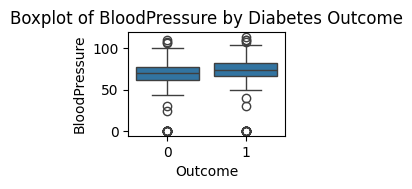

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


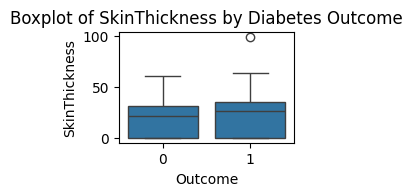

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


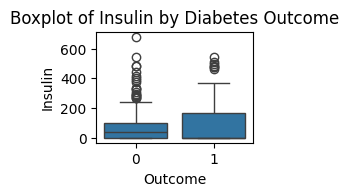

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


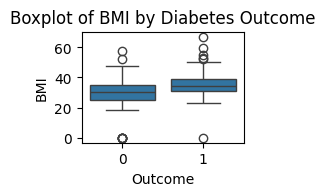

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


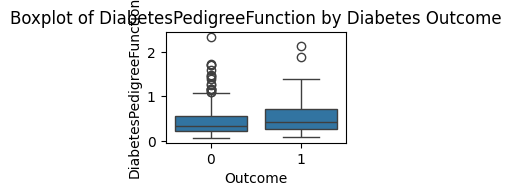

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


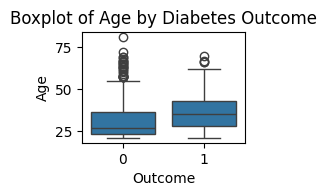

In [ ]:
def plot_correlation(df):
    plt.figure(figsize=(15,10))
    for i, column in enumerate(df.columns[:-1]): # Corrected 'column' to 'columns'
        plt.subplot(3,3,i+1)
        sns.boxplot(x = 'Outcome', y=column, data=df) # Corrected 'oucome' to 'Outcome'
        plt.title(f'Boxplot of {column} by Diabetes Outcome')
        plt.tight_layout()
        plt.show()

plot_correlation(df)

<Axes: >

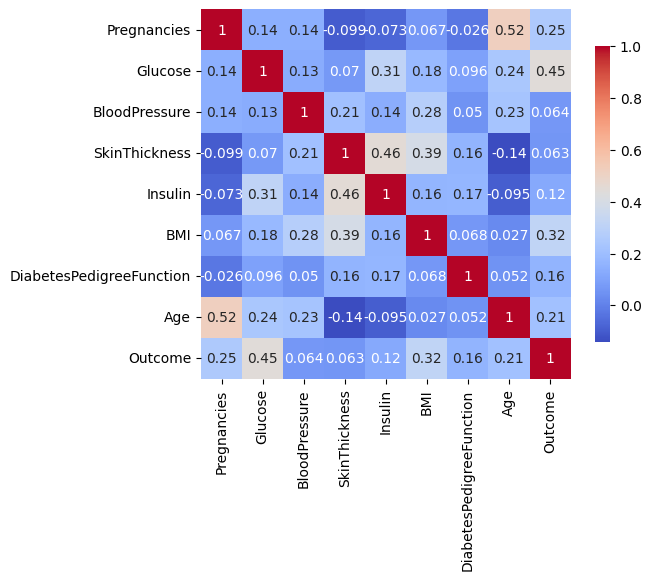

In [ ]:
# Untuk melihat korelasi antar variabel(Menggunakan Heatmap)
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',
            square=True, cbar_kws={'shrink': .8})

Kodeprogram tersebut digunakan untuk menunjukkan koelasi antar variabel dalam sebuah dataset. Heatmap ini digunakan dengan menggunakan fungsi sns.heatmap. Sumbu X dan Y berisi nama-nama kolom (variabel) dari dataset. Di dalam matriks, setiap sel menunjukkan nilai korelasi Pearson antara dua variabel.
Korelasi berkisar dari -1 hingga 1:
*   Nilai 1 berarti ada korelasi positif sempurna (semakin besar variabel satu, semakin besar variabel lain).
*   Nilai -1 berarti korelasi negatif sempurna (semakin besar variabel satu, semakin kecil variabel lain).
*   Nilai 0 berarti tidak ada korelasi.

Contohnya, korelasi antara Glucose dan Outcome adalah 0.45, yang menunjukkan korelasi positif moderat antara kadar glukosa dan hasil (kemungkinan diabetes).

Sedangkan Warna pada heatmap menunjukkn kekuatan korelasinya:
*   Merah tua menunjukkan korelasi positif yang tinggi.
*   Biru tua menunjukkan korelasi negatif atau mendekati nol
*   Warna-warna lebih terang menunjukkan nilai korelasi yang rendah atau moderat.






In [ ]:
df_text= pd.read_excel("/content/foodreviews.xlsx")
df_text.head()

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,CFB000UA0,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,CFB006K2Z,0,5,Great taffy,Great taffy at a great price. There was a wid...


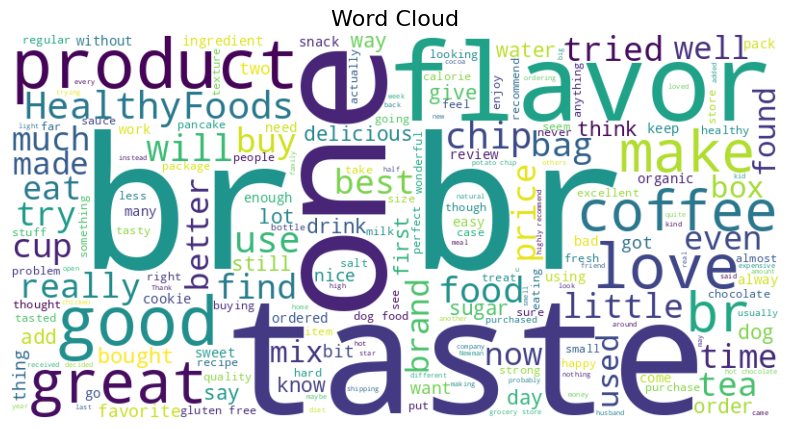

In [ ]:
text = ''.join(review for review in df_text.Text)

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height = 400,
                          background_color='white',
                          colormap = 'viridis').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud', fontsize=16)
    plt.show()

plot_wordcloud(text)

Word Cloud adalah representasi grafis dari teks, ukuran kata kata muncul adalah gambaran dari frekuensi atau kepentingan kata tersebut dalam teks. Kata yang lebih sering muncul dalam teks akan ditampilkan lebih besar di Word Cloud.

# Processing

In [11]:
imputer = KNNImputer(n_neighbors=5)
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Setelah dilakukan imputasi nilai missing value menjadi 0

In [ ]:
# Menghapus kolom atau baris dalam DataFrame
x= df.drop('Outcome', axis=1) # axis=1 menunjukkan bahwa yang dihapus adalah kolom
y= df['Outcome']# Outcome = nama kolom yang ingin dihapus


In [ ]:
# Menangani ketidakseimbangan data (imbalanced data) dengan teknik SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

<Axes: xlabel='Outcome', ylabel='count'>

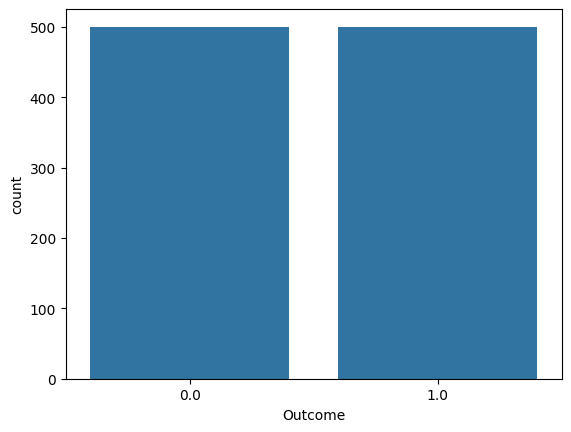

In [ ]:
# untuk menampilkan grafik count plot (plot frekuensi) dari variabel target yang sudah di-resample setelah menggunakan SMOTE.
sns.countplot(x=y_resampled, data=x_resampled)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,165.2,72.0,35.0,0.0,33.54,0.6270,36.0,1.0
1,1.0,85.0,66.0,29.0,0.0,34.54,0.3510,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.6720,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.10,0.1670,21.0,0.0
4,0.0,147.8,40.0,35.0,168.0,43.10,0.5078,33.0,1.0


In [ ]:
# Menyamakan satuannya (standarisasi)
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['columns'])] = scaler.fit_transform(df[df.columns.difference(['columns'])])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.631558,1.341591,0.161680,0.909160,-0.762150,0.145372,0.509348,0.239937
1,-0.960924,-1.343540,-0.162144,0.525073,-0.762150,0.293760,-0.424792,-0.249485
2,1.268551,1.937542,-0.270085,-1.331350,-0.762150,-1.374123,0.661654,-0.151600
3,-0.960924,-1.209618,-0.162144,0.140986,0.158329,-0.661860,-1.047552,-1.228329
4,-1.279421,0.759031,-1.565378,0.909160,0.882961,1.563963,0.105908,-0.053716
